<a href="https://colab.research.google.com/github/leticiamelom/angular-cli/blob/master/credit_agro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
from sklearn.metrics import plot_confusion_matrix

In [69]:
from sklearn.impute import SimpleImputer

In [73]:
import numpy as np

In [85]:
from sklearn.model_selection import train_test_split

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
from sklearn.preprocessing import StandardScaler

In [112]:
from sklearn.metrics import confusion_matrix, accuracy_score 


In [113]:
import matplotlib.pyplot as plt 

In [33]:
import pandas as pd
base = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/credit-data.csv")
print(base)

      clientid        income        age         loan  default
0            1  66155.925095  59.017015  8106.532131        0
1            2  34415.153966  48.117153  6564.745018        0
2            3  57317.170063  63.108049  8020.953296        0
3            4  42709.534201  45.751972  6103.642260        0
4            5  66952.688845  18.584336  8770.099235        1
...        ...           ...        ...          ...      ...
1995      1996  59221.044874  48.518179  1926.729397        0
1996      1997  69516.127573  23.162104  3503.176156        0
1997      1998  44311.449262  28.017167  5522.786693        1
1998      1999  43756.056605  63.971796  1622.722598        0
1999      2000  69436.579552  56.152617  7378.833599        0

[2000 rows x 5 columns]


In [39]:
base.loc[22]

clientid       23.000000
income      23329.319414
age            48.576975
loan          222.622299
default         0.000000
Name: 22, dtype: float64

In [29]:
base.columns

Index(['clientid', 'income', 'age', 'loan', 'default'], dtype='object')

In [30]:
base['age'][base.age>0].mean()

40.92770044906149

In [40]:
base.loc[base.age < 0, 'age'] = 40.92

In [67]:
previsores = base.iloc[:, 1:4].values

In [68]:
classe = base.iloc[:, 4].values

In [74]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [75]:
imputer = imputer.fit(previsores[:, 1:4])

In [78]:
previsores[:, 1:4] = imputer.transform(previsores[:, 1:4])

In [83]:
base = base.dropna()
base

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [86]:
x_train, x_test, y_train, y_test = train_test_split(previsores, classe, test_size=0.3)

In [87]:
x_train

array([[2.79474403e+04, 5.83484552e+01, 5.51411742e+03],
       [3.04832955e+04, 3.36564412e+01, 4.51400978e+03],
       [5.88873575e+04, 2.60760930e+01, 4.96551607e+03],
       ...,
       [6.60499340e+04, 2.93157674e+01, 1.31726813e+04],
       [3.04516362e+04, 4.21971367e+01, 4.75420592e+02],
       [2.20488950e+04, 5.37982525e+01, 4.19902436e+03]])

In [88]:
y_train

array([0, 1, 0, ..., 1, 0, 0])

In [91]:
classif = RandomForestClassifier(n_estimators=50)

In [93]:
classif.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [96]:
prev = classif.predict(x_test)
prev

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,

In [103]:
result = accuracy_score(y_test, prev)
result

0.9816666666666667

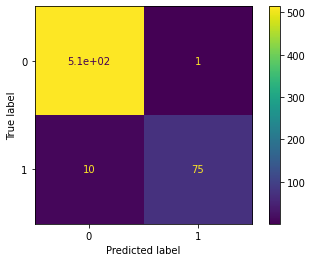

In [125]:
plot_confusion_matrix(classif, x_test, y_test)
plt.show()